# Python Hackathon Questions with Solutions


In [24]:
#pip install wordcloud

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [60]:
#Importing the dataset
Patients = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Patients')
EDVisits = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits')
AmbulatoryVisits = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'AmbulatoryVisits')
ReadmissionRegistry = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
Discharges = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Discharges')
Providers = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Providers')
EDUnique= pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDUnique')

In [61]:
#Code to check if data is imported properly, delete it before submission
#Patients.head()
#EDVisits.head()
#AmbulatoryVisits.head()
#ReadmissionRegistry.head()
#Discharges.head()
#Providers.head()
#EDUnique.head()

In [62]:
#Question 1 - Replace all the null values in ReadmissionFlag with 0.

ReadmissionRegistry['ReadmissionFlag'] = ReadmissionRegistry['ReadmissionFlag'].fillna(0)
ReadmissionRegistry.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN


In [63]:
#Question 2 - Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

x = input("Please enter reason for visit : ")
count = 0
for reason in EDVisits['ReasonForVisit']:
    if reason == x:
        count+=1
print("Number of patients admitted with {} is {}".format(x, count))

Please enter reason for visit : Chest Pain
Number of patients admitted with Chest Pain is 109


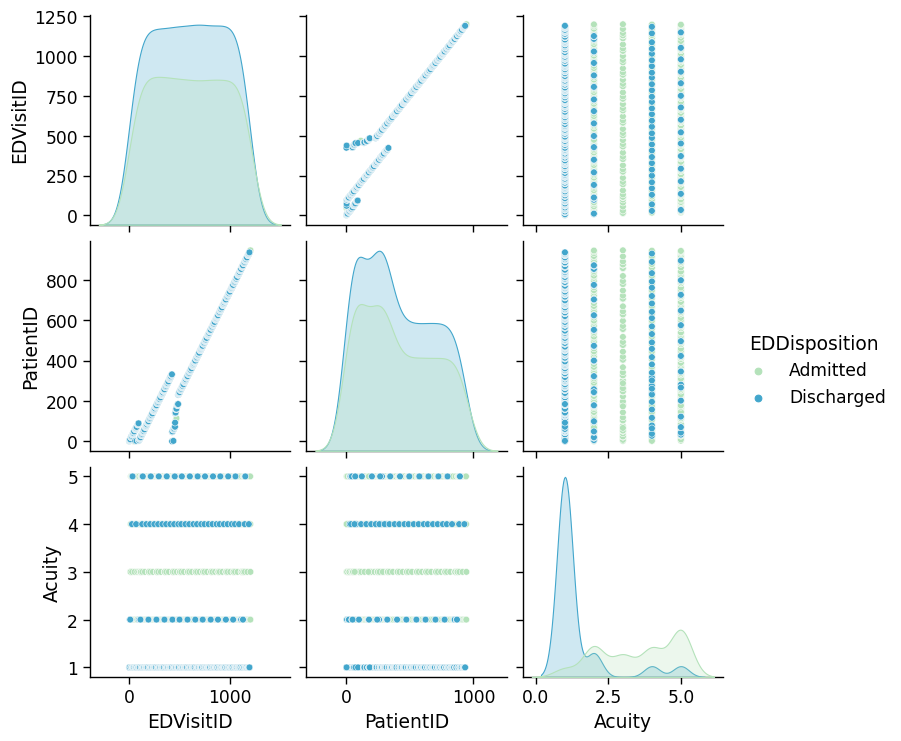

In [64]:
#Question 3 - Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition

sns.pairplot(EDVisits,hue='EDDisposition',palette='GnBu')
plt.show()


In [65]:
#Question 4 - Find the count of Spanish Speaking patients.

count = 0
for language in Patients['Language']:
    if language == 'Spanish':
        count+=1
print("Count of Spanish speaking patients = {}".format(count))

Count of Spanish speaking patients = 110


In [221]:
#Question 5 - Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T. 
#(Attach screenshots for this question)

In [66]:
#Question 6 - Find the list of patients whose ExpectedLOS is greater than the value given by the user.
x = int(input("Enter a number for expected LOS : "))
print("\nAdmission ID\t Patient ID\t ExpectedLOS ")
for index,row in ReadmissionRegistry.iterrows(): # Method in pandas library to iterate over each row of a dataframe
    if  row['ExpectedLOS'] > x:
            y= round(row['ExpectedLOS'],2)
            print("{}          \t {}   \t         {}".format(row['AdmissionID'], row['PatientID'], y))
  


Enter a number for expected LOS : 4

Admission ID	 Patient ID	 ExpectedLOS 
389          	 1   	         6.72
640          	 6   	         13.65
434          	 7   	         9.56
549          	 8   	         16.47
1          	 9   	         9.65
355          	 10   	         14.79
54          	 11   	         12.08
568          	 12   	         7.16
107          	 13   	         4.55
18          	 14   	         10.06
140          	 14   	         10.55
305          	 15   	         6.37
146          	 16   	         13.83
439          	 17   	         8.36
199          	 18   	         10.42
252          	 19   	         15.35
419          	 19   	         8.2
569          	 20   	         4.9
650          	 20   	         5.48
253          	 21   	         4.75
55          	 23   	         13.33
671          	 23   	         11.37
208          	 23   	         6.38
108          	 24   	         6.72
178          	 26   	         6.31
141          	 26   	         7.96
550          	 

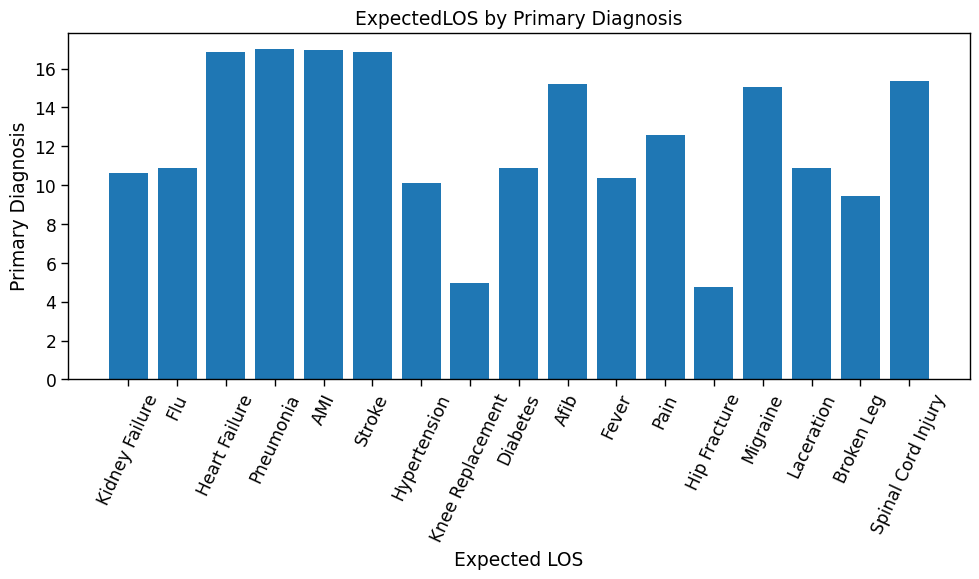

In [223]:
#Question 7 - Create a bar chart between expectedLOS & Primary diagnosis.
x=np.array(ReadmissionRegistry['PrimaryDiagnosis'])
y=np.array(ReadmissionRegistry['ExpectedLOS'])

plt.figure(figsize=(10,6))     #To increase the figure size
plt.bar(x, y)
plt.ylabel('Primary Diagnosis')
plt.xlabel('Expected LOS')
plt.title('ExpectedLOS by Primary Diagnosis')
plt.xticks(rotation = 65)      # To rotate labels by an angle to so they do not overlap
    
plt.tight_layout()             # To adjust layout of the plot to avoid overlapping labels
plt.show()


In [29]:
#Question 8 - Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

warnings.filterwarnings("ignore", category=FutureWarning)

filtered_df = pd.DataFrame() #Initialize the empty data frame

#Filter the dataset for retrieving patient details where 'ReasonForVisit' is either 'Migraine' or 'Pneumonia'
for index,row in EDVisits.iterrows():
    if  ((row['ReasonForVisit'] == 'Pneumonia' or row['ReasonForVisit'] == 'Migrane') and row['Acuity'] >=2):
        filtered_df = filtered_df.append(row, ignore_index = True)
filtered_df



,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
1,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
2,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
3,32,32,2020-01-01 07:58:39.779,2020-01-02 00:47:40.244,2,Pneumonia,Admitted
4,44,44,2020-01-01 11:41:20.981,2020-01-02 05:18:13.677,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
130,1158,904,2020-01-15 02:06:42.088,2020-01-15 07:04:01.523,4,Pneumonia,Admitted
131,1167,913,2020-01-15 05:09:22.987,2020-01-16 03:57:13.244,4,Pneumonia,Admitted
132,1170,916,2020-01-15 05:57:29.834,2020-01-15 06:03:50.631,4,Pneumonia,Admitted
133,1171,917,2020-01-15 06:27:24.353,2020-01-15 10:16:03.795,2,Pneumonia,Admitted


In [68]:
#Question 9 - "Using numpy functions, multiply the following arrays

a=np.arange(6).reshape(2,3)
print(a)
print('\n')
b=(np.arange(6).reshape(3,2)).T
print(b)
print('\n')
print('The product of two matrices :\n')
print(a*b)


[[0 1 2]
 [3 4 5]]


[[0 2 4]
 [1 3 5]]


The product of two matrices :

[[ 0  2  8]
 [ 3 12 25]]


In [69]:
#Question 10 - Display data by splitting age in 4 quartiles and labeling the quartiles.

#Initializing the day and age_list variables
day = datetime.now()
age_list = []
Patient_AgeData = Patients

#Calculating age from date of birth
for index, row in Patients.iterrows():
    dateofbirth = row['DateOfBirth']
    age_timedelta = (day-dateofbirth)
    age_years = age_timedelta.days//365.25
    age_list.append(int(age_years))
    

#Converting the Age dataframe to pandas series and appending it to the Patients dataframe
Patient_AgeData['Age'] = pd.Series(age_list)

#Calculating quartiles using numpy

Q1 = np.percentile(Patient_AgeData['Age'],25)
Q2 = np.percentile(Patient_AgeData['Age'],50)
Q3 = np.percentile(Patient_AgeData['Age'],75)
Q4 = np.percentile(Patient_AgeData['Age'],100)

#Creating a new column to hold age quartile and initializing it
Patient_AgeData['Age_Quartile'] = ''

for index,row in Patient_AgeData.iterrows():
    
    if row['Age'] <= Q1:
        Patient_AgeData.at[index,'Age_Quartile'] = 'Quartile 1'
    elif row['Age'] <= Q2:
         Patient_AgeData.at[index,'Age_Quartile'] = 'Quartile 2'
    elif row['Age'] <= Q3:
         Patient_AgeData.at[index,'Age_Quartile'] = 'Quartile 3'
    else:
         Patient_AgeData.at[index,'Age_Quartile'] = 'Quartile 4'

Patient_AgeData


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age_Quartile
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63,Quartile 4
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37,Quartile 1
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,47,Quartile 2
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54,Quartile 3
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,61,Quartile 4
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,37,Quartile 1
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,53,Quartile 3
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40,Quartile 1
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,60,Quartile 4


In [71]:
# Question 11: Calculate average LOS.

ReadmissionRegistry['AdmissionDate'] = pd.to_datetime(ReadmissionRegistry['AdmissionDate'])
ReadmissionRegistry['DischargeDate'] = pd.to_datetime(ReadmissionRegistry['DischargeDate'])
ReadmissionRegistry['LengthOfStay'] = (ReadmissionRegistry['DischargeDate'] - ReadmissionRegistry['AdmissionDate']).dt.days
average_length_of_stay = ReadmissionRegistry['LengthOfStay'].mean()
print(f"Average Length of Stay: {average_length_of_stay:.2f} days")

Average Length of Stay: 9.53 days


In [73]:
#Question 12 Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

DischargeDate = 'DischargeDate'
ReadmissionRegistry[DischargeDate] = pd.to_datetime(ReadmissionRegistry[DischargeDate])
date_time_df = pd.DataFrame({
    'Date': ReadmissionRegistry[DischargeDate].dt.date,
    'Time': ReadmissionRegistry[DischargeDate].dt.time
})

print(date_time_df)

           Date             Time
0    2018-01-04  19:59:31.391000
1    2018-01-04  21:28:51.898000
2    2018-01-04  22:28:23.672000
3    2018-01-05  05:47:04.933000
4    2018-01-05  14:18:30.029000
..          ...              ...
715  2018-03-07  21:22:10.061000
716  2018-03-08  02:43:18.749000
717  2018-03-08  09:27:18.377000
718  2018-03-10  06:06:12.068000
719  2018-03-10  20:38:30.568000

[720 rows x 2 columns]


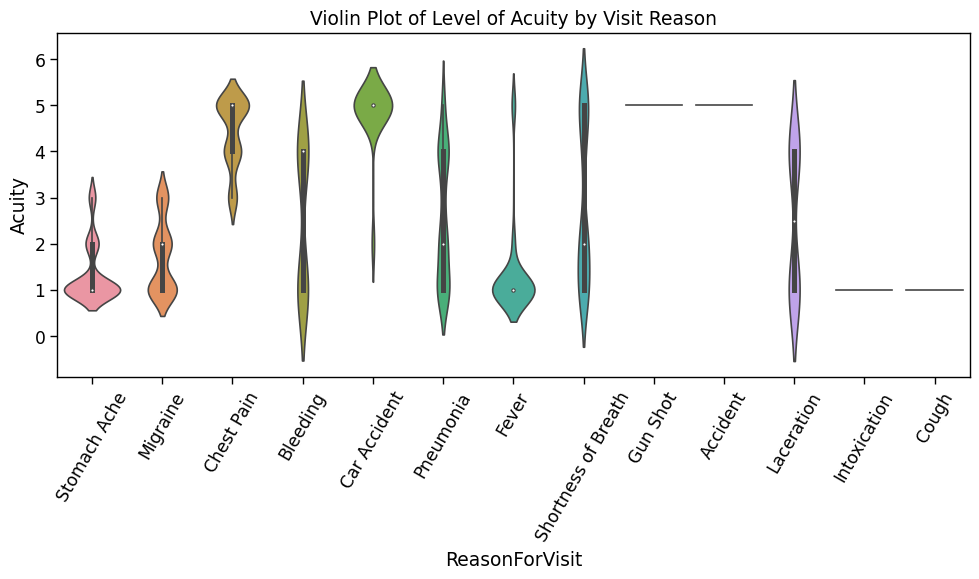

In [74]:
# Question 13 Violin plot for Level of Acuity by Visit Reason


#EDVisits = pd.read_excel('HospitalDatabase.xlsx',sheet_name = 'EDVisits')
Acuity = 'Acuity'
ReasonForVisit = 'ReasonForVisit'
plt.figure(figsize=(10, 6))  
sns.violinplot(x=ReasonForVisit, y=Acuity, data=EDVisits)
plt.xlabel("ReasonForVisit")
plt.ylabel("Acuity")
plt.title("Violin Plot of Level of Acuity by Visit Reason")
plt.xticks(rotation=60)  
plt.tight_layout()
plt.show()

In [78]:
#Question 14:Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).

ProviderSpecialty = Providers['ProviderSpecialty']
groups = Providers.groupby(ProviderSpecialty).groups
print("Provider Specialty : \n")
for specialty in groups:
    print(specialty)

Provider Specialty : 

Cardiology
Pediatrics
PrimaryCare
Surgery


In [79]:
#Question 15:Count of canceled status.

VisitStatus = 'VisitStatus'
df_new = AmbulatoryVisits[AmbulatoryVisits[VisitStatus]=='Canceled']
canceled_count = df_new[VisitStatus].count()
print(f"Count of 'canceled' status: {canceled_count}")

Count of 'canceled' status: 60


In [80]:
#Question 16 - Display total count of patients service wise  based on gender.

#Merging the Patients & Discharges dataframes
Patients_Discharges = pd.merge(Patients, Discharges, on='PatientID', how='left')


#Grouping the data based on Service & Gender and using size() to get the count of patients in each category
servicewise_gender_counts = Patients_Discharges.groupby(['Service', 'Gender']).size()
print(servicewise_gender_counts)


Service           Gender
Cardiology        Female     41
                  Male       54
General Medicine  Female    114
                  Male      149
Hospitalist       Female     35
                  Male       66
ICU               Female     65
                  Male       86
Neurology         Female     34
                  Male       31
Orthopeadics      Female     22
                  Male       23
dtype: int64


In [82]:
#Question 18 - Display the data where actual LOS is greater than expected LOS. 

warnings.filterwarnings("ignore", category=FutureWarning)

#Initialize the empty data frame
filtered_df = pd.DataFrame() 

# Code block that checks if actual LOS is greater than expected LOS and creates a data frame with filtered data
for index, row in Discharges.iterrows():
    los = row['DischargeDate'] -row['AdmissionDate']
    los_float = los.days + los.seconds / (60 * 60 * 24)
    if los_float > row['ExpectedLOS']:
        filtered_df = filtered_df.append(row, ignore_index = True)

#Displaying the results
filtered_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
1,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
2,395,109,2018-01-07,2018-01-22 17:57:37.103,Expired,Cardiology,Flu,2.981758,0.192976
3,396,115,2018-01-08,2018-01-17 02:19:05.623,Expired,Cardiology,Flu,4.959098,0.254923
4,259,116,2018-01-08,2018-01-20 03:40:53.605,Expired,Cardiology,Broken Leg,2.279624,0.491274
...,...,...,...,...,...,...,...,...,...
411,703,703,2018-02-21,2018-02-27 08:53:38.211,Transfer,General Medicine,Pneumonia,3.539165,0.275691
412,709,708,2018-02-21,2018-03-01 05:59:22.116,Transfer,General Medicine,Diabetes,4.518876,0.455570
413,697,713,2018-02-21,2018-03-04 00:23:19.967,Transfer,General Medicine,Pneumonia,8.542970,0.201036
414,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695


In [83]:
#Question 19 - Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

#Finding individual LOS for each observation
Discharges['AdmissionDate'] = pd.to_datetime(Discharges['AdmissionDate'])
Discharges['DischargeDate'] = pd.to_datetime(Discharges['DischargeDate'])
Discharges['LengthOfStay'] = (Discharges['DischargeDate'] - Discharges['AdmissionDate']).dt.days

#Calculating & displaying avg LOS for each Service and DischargeDisposition combination
Avg_LOS = Discharges.groupby(['Service', 'DischargeDisposition']).agg({'PatientID': 'count', 'LengthOfStay': 'mean'})
Avg_LOS.rename(columns={'PatientID': 'Count', 'LengthOfStay': 'Average_Length_Of_Stay'}, inplace=True)
print(Avg_LOS)


                                       Count  Average_Length_Of_Stay
Service          DischargeDisposition                               
Cardiology       Expired                  15                8.866667
                 Home                     75               10.186667
                 Transfer                  5               11.200000
General Medicine Expired                  18                8.500000
                 Home                    229                9.772926
                 Transfer                 16               10.687500
Hospitalist      Expired                  10               10.000000
                 Home                     88                9.034091
                 Transfer                  3                8.666667
ICU              Expired                  29                9.275862
                 Home                    110                9.127273
                 Transfer                 12                8.833333
Neurology        Expired          

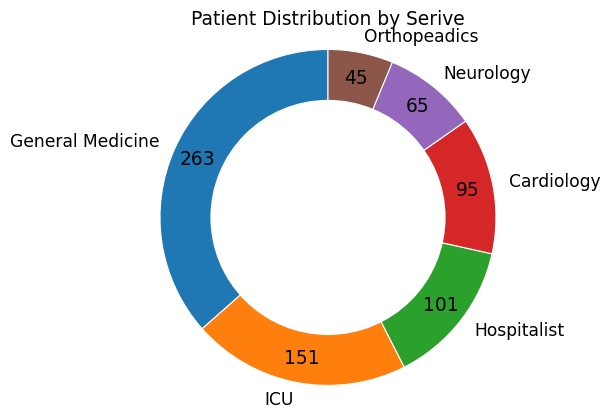

In [84]:
#Question 20 - Display using a donut chart the patient count in the ReAdmissionRegistry.

# To calculate the count of patients for each service
Patientct_Service = ReadmissionRegistry['Service'].value_counts()  

# Code to create donut chart
fig, ax = plt.subplots()
ax.pie(Patientct_Service, labels=Patientct_Service.index, autopct=lambda p: '{:.0f}'.format(p * sum(Patientct_Service) / 100), startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')  

plt.title('Patient Distribution by Service')
plt.show()

In [131]:
#Q21:Find reasonForVisit with highest count of acuity 5 patients.
# pandas and EDUnique is refered as ED unique sheet in our data set
df1=EDUnique.loc[(EDUnique['Acuity'] == 5)]
df1['ReasonForVisit'].value_counts().idxmax()

'Chest Pain'

In [132]:
#Q22: Find the visit type with maximum 'No Show'.

df1=AmbulatoryVisits.groupby('VisitStatus')
df2=df1.get_group('No Show').max()
print(df2['VisitType'])

Telemedicine


In [133]:
#Q23: Get the list of patient ID's which are not there in ReadmissionRegistry.

#Code to find patient IDs that are common between two tables and ones that are in Patients table,
#along with IDs that are common with the Readmission Registry

Patients_In_PatientsList = pd.merge(Patients, ReadmissionRegistry, on = 'PatientID', how='left')
Common_PatientsWithRR = pd.merge(Patients, ReadmissionRegistry, on = 'PatientID', how='inner')
Pt_ID = Common_PatientsWithRR['PatientID'].unique()

#Code to display patients in Patients table only, or the ones not present in Readmission Registry
Patients_In_PatientsList[~Common_PatientsWithRR .isin(df)].dropna()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age_Quartile,AdmissionID,...,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,LengthOfStay
6,7.0,Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English,47.0,Quartile 2,434.0,...,2018-01-06 13:01:00.276,Home,Hospitalist,Pneumonia,9.555047,0.063634,1.0,4.0,1.0,5.0
10,11.0,Dean,Kimberly,1972-02-22 19:23:49.981,Male,White,Spanish,51.0,Quartile 3,54.0,...,2018-01-08 19:53:38.845,Home,Hospitalist,Pneumonia,12.081905,0.932385,1.0,6.0,1.0,7.0
32,27.0,Mike,Bing,1977-07-29 08:44:38.988,Female,White,Spanish,46.0,Quartile 2,550.0,...,2018-01-13 07:34:46.603,Home,ICU,Pneumonia,15.415514,0.774480,1.0,5.0,1.0,11.0
34,29.0,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55.0,Quartile 3,200.0,...,2018-01-15 14:08:36.007,Home,General Medicine,Pneumonia,9.589547,0.086662,1.0,5.0,1.0,13.0
85,80.0,Mandi,Cripps,1964-12-22 21:29:11.410,Female,White,Spanish,58.0,Quartile 4,393.0,...,2018-01-14 01:34:57.411,Home,General Medicine,Flu,2.508401,0.199822,1.0,5.0,1.0,9.0


In [134]:
#Q24: Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

data = pd.read_excel("HospitalDatabase.xlsx",sheet_name= "EDUnique", usecols=['PatientID','ReasonForVisit','EDDisposition'])
stacked_data=data.stack(0)
print(stacked_data)
print( "Number of patients " + str(data.count()))

0    PatientID                    1
     ReasonForVisit    Stomach Ache
     EDDisposition         Admitted
1    PatientID                   12
     ReasonForVisit        Migraine
                           ...     
943  ReasonForVisit       Pneumonia
     EDDisposition       discharged
944  PatientID                  935
     ReasonForVisit       Pneumonia
     EDDisposition       discharged
Length: 2835, dtype: object
Number of patients PatientID         945
ReasonForVisit    945
EDDisposition     945
dtype: int64


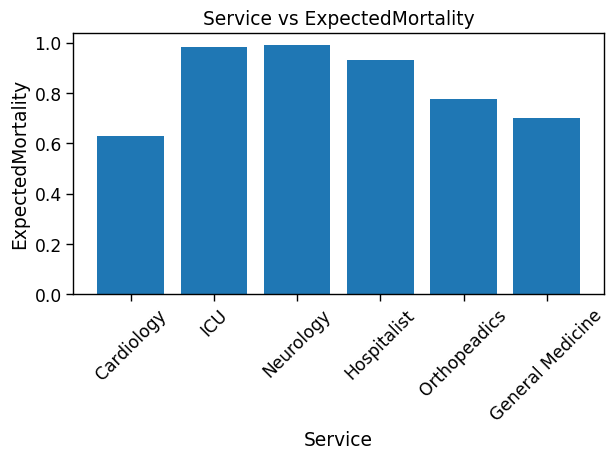

In [217]:
#Q25:Using a bar chart, which Service had the lowest count of Expected Mortality?

plt.bar(Discharges['Service'],Discharges['ExpectedMortality']) #bar chart mention axis here
plt.title('Service vs ExpectedMortality') #bar chart title
plt.xlabel('Service')
plt.xticks(rotation=45)
plt.ylabel('ExpectedMortality')    
plt.tight_layout()
plt.show()

In [136]:
#Q26 Using arrays and loops, find the count of patients based on gender.
import pandas as pd
#getting the count of patients and then using loop concent to find the count of gender
count=int(len(Patients))
k=0
male_count=0
female_count=0
while(k<count):
    if(Patients['Gender'].iat[k]=="Male"):
        male_count+=1
    else:
        female_count+=1
    k+=1

print(" Male:",male_count,"\n","Female:",female_count)

 Male: 537 
 Female: 408


In [137]:
# Q 27:Which demographic patients are prone to get stroke
#here in df merges discharge and patients both patiend id

df = Discharges.merge(Patients,on="PatientID")
df3=df.loc[(df['PrimaryDiagnosis'] == 'Stroke')]
print('Demographics of patient most prone to stroke :')
df4 = df3[['Race','Language','Gender']].value_counts().reset_index(name='Counts')
rslt_df = df4[df4['Counts'] == max(df4['Counts'])]
rslt_df

Demographics of patient most prone to stroke :


,Race,Language,Gender,Counts
0,Black/African-American,English,Male,18


In [138]:
#Q28:Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

df1 = Patients[Patients['FirstName'].str.contains("lau|LAU|Lau|lAu|laU|LAu|lAU|LaU")==True]
df2 = Patients[Patients['LastName'].str.contains("lau|LAU|Lau|lAu|laU|LAu|lAU|LaU")==True]
df1df2 = pd.concat([df1, df2], axis=0) #display it in proper like wise in sheet
df1df2

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age_Quartile
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English,61,Quartile 4
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English,63,Quartile 4
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English,40,Quartile 1
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English,54,Quartile 3
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English,61,Quartile 4
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English,58,Quartile 4
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English,56,Quartile 3
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English,53,Quartile 3
910,911,Zulauf,Orbine,1973-06-26 03:13:50.449,Male,Black/African-American,English,50,Quartile 3
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English,50,Quartile 3


In [139]:
#Q29 Display full name of patients who are born in 1986.
#used panda and here patients refered to sheet name patient from the data set

df1=Patients.loc[(Patients['DateOfBirth'] >= '1986-01-01 00:00:00.000') & (Patients['DateOfBirth'] < '1987-01-01 00:00:00.000')]
df1["FirstName"].astype(str) +" "+ df1["LastName"]

23         Gabriel  Joseph
24         Lincoln  Brenda
29             Ala Halpert
72            Lolita Darci
164         Fadel Bernardt
238         Bentley Kippax
367            Vale Olanda
373          Britt Dureden
386       Cristabel Chatel
415       Constantia Group
452       Morgan Scrowston
561             Dom Baglow
568        Ignazio Melling
595         Homenick Rings
639           Hashim Slark
643       Ellie Ramsbotham
674        Llewellyn Group
714             Niles Shaw
733             Yvette Inc
777          Siouxie Group
852            Carly Group
868        Worth Pickering
877           Arni Baldack
909       Kuvalis Coupland
922    Rebbecca Rollingson
940            Wat Fideler
dtype: object

In [141]:
#Q30:Retrieve the row with minimum DBP using sorting technique.
#just printing minimum DBP with sorting
df1 = AmbulatoryVisits.sort_values(by=['BloodPressureDiastolic'])
print("Row with the minimum DBP : \n")
df1.head(1)

Row with the minimum DBP : 



,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


In [ ]:
#Q31

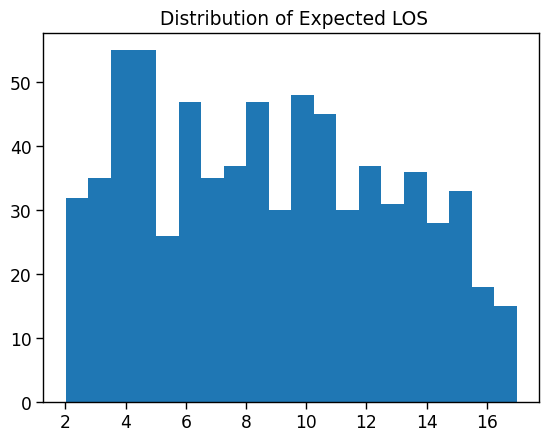

In [231]:
#Question 41 -Plot a graph to show the distribution of expected length of stay.

#Converting the ExpectedLOS column of  ReadmissionRegistry to numpy array & plotting the histogram
x = np.array(ReadmissionRegistry['ExpectedLOS'])
plt.hist(x, bins = 20)
plt.title(' Distribution of Expected LOS')
plt.show()


In [232]:
#Question 42 - Delete the column 'DischargeDispostion' iteratively.

ReadmissionRegistryEdited = ReadmissionRegistry
x= ['DischargeDisposition']
for i in x:
    if i in ReadmissionRegistryEdited:
        ReadmissionRegistryEdited.drop(i, axis=1, inplace=True)
        
ReadmissionRegistryEdited.head()


,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN


In [46]:
#Question 43 - Find the age prone to get stroke.
from scipy import stats
warnings.filterwarnings("ignore", category=FutureWarning)

day = datetime.now()
columns = ['PatientID', 'Age', 'PrimaryDiagnosis']
PatientID_Age_Diagnosis = pd.DataFrame(columns=columns)

#Merging 2 Dataframes 

Patients_Discharges = pd.merge(Patients, Discharges, on='PatientID', how='left')


#Code to calculate age from date of birth
for index, row in Patients_Discharges.iterrows():
    dateofbirth = row['DateOfBirth']
    age_timedelta = (day-dateofbirth)
    age_years = age_timedelta.days//365.25
    PatientID_Age_Diagnosis = PatientID_Age_Diagnosis.append({'PatientID': row['PatientID'], 'Age': age_years, 'PrimaryDiagnosis': row['PrimaryDiagnosis']}, ignore_index=True)

#Filtering the   PatientID_Age_Diagnosis dataframe to get rows with stroke as primary diagnosis
stroke_records = PatientID_Age_Diagnosis[PatientID_Age_Diagnosis['PrimaryDiagnosis'] == 'Stroke']

# Calculating the mode of the 'Age' column which also indicates the age more #prone to stroke
age_mode = stats.mode(stroke_records['Age'])
print("Age most prone to get stroke: {}".format(age_mode.mode[0]))

Age most prone to get stroke: 55.0


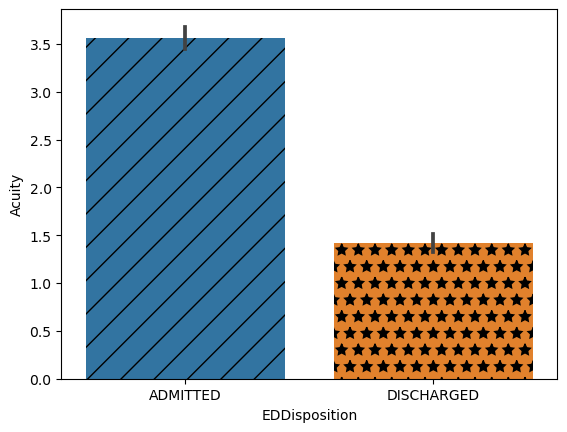

In [6]:
#Question 44 - Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

df1=pd.read_excel("HospitalDatabase.xlsx",sheet_name="EDUnique")
df1['EDDisposition'] = df1['EDDisposition'].str.upper()
bars=sns.barplot(x='EDDisposition', y='Acuity', data=df1)
hatches = ["*", "/", "o", "x"]

for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])
plt.show()


In [235]:
#Question 45 - Usage of Enumeration in Python with any example

#enumerate() is used to add a counter to an iterable object such as list, tuple or dictionary and return it
# as an enumerating object. Used instead of a counter variable to keep track of number of iterations in loop. 


l1 = ['Cariology', 'Orthopedics', 'General Surgery', 'Urology', 'Nephrology', 'Pediatrics', 'ENT', 'Gastroentrology']

l2 = enumerate(l1)
print(list(l2))       # Notice the default index added in the output of this statement
print('\n')

l3 = enumerate(l1,4) # Pass the value of the custom index to start index at any other position other than 0.
print(list(l3)) 


[(0, 'Cariology'), (1, 'Orthopedics'), (2, 'General Surgery'), (3, 'Urology'), (4, 'Nephrology'), (5, 'Pediatrics'), (6, 'ENT'), (7, 'Gastroentrology')]


[(4, 'Cariology'), (5, 'Orthopedics'), (6, 'General Surgery'), (7, 'Urology'), (8, 'Nephrology'), (9, 'Pediatrics'), (10, 'ENT'), (11, 'Gastroentrology')]


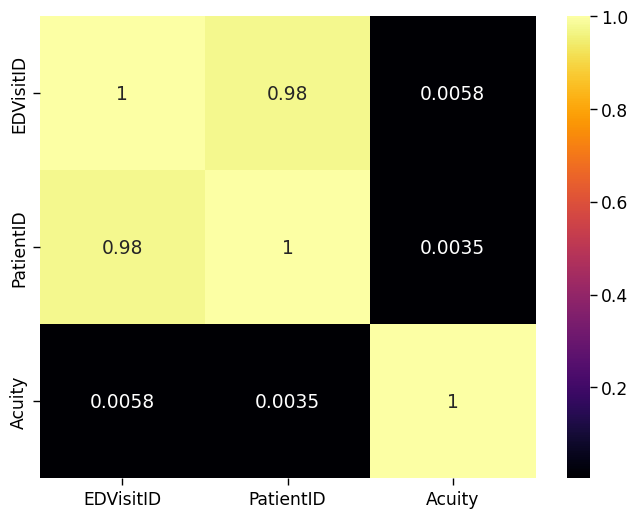

In [58]:
#Question 46- Create a heat map to show the correlation between the column values of Edvisits.
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
EDVisits_mx = EDVisits.corr()
#crash_mx
sns.heatmap(EDVisits_mx, annot=True,cmap='inferno')
plt.show()


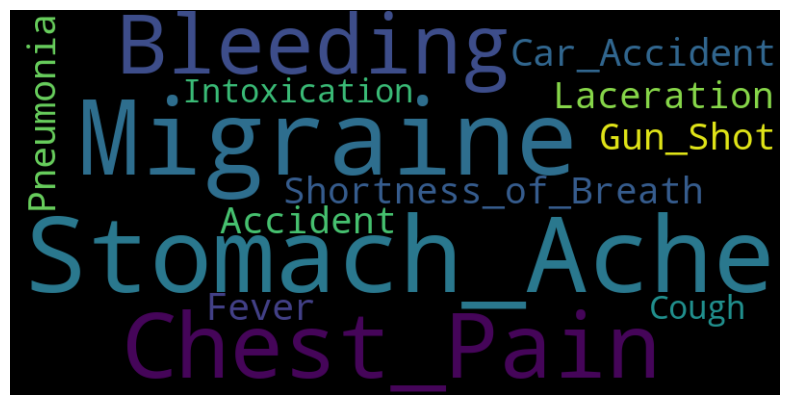

In [195]:
#Question 47 - Create a WordCloud Chart with Reason For Visit.

from wordcloud import WordCloud
ReasonForVisit = 'ReasonForVisit'

ReasonForVisit = 'ReasonForVisit'

# Drop duplicate values from the 'ReasonForVisit' column
unique_reasons = EDVisits[ReasonForVisit].drop_duplicates()

# Replace spaces with underscores in the values
unique_reasons = unique_reasons.str.replace(' ', '_')

# Combine all unique reasons for visit into a single string
reasons_text = ' '.join(unique_reasons.dropna())

# Generate the Word Cloud chart
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reasons_text)

# Display the Word Cloud chart
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
#Question 48 -List male patients over the age of 60 who have undergone surgery from January-March 2019.

import warnings
from datetime import datetime
day = datetime.now()

warnings.filterwarnings("ignore", category=FutureWarning)

columns = ['PatientID', 'Age']
PatientID_Age = pd.DataFrame(columns=columns)

#Merging 2 Dataframes 

Patients_AmbulatoryVisits = pd.merge(Patients, AmbulatoryVisits, left_on='PatientID', right_on ='PatientMRN', how='inner')
Patients_AmbulatoryVisits_Providers = pd.merge(Patients_AmbulatoryVisits, Providers, on='ProviderID', how='inner')


#Code to calculate age from date of birth
for index, row in Patients_AmbulatoryVisits_Providers.iterrows():
    dateofbirth = row['DateOfBirth']
    age_timedelta = (day-dateofbirth)
    age_years = age_timedelta.days//365.25
    PatientID_Age = PatientID_Age.append({'PatientID': row['PatientID'], 'Age': age_years}, ignore_index=True)
    
Patients_AmbulatoryVisits_Providers_Age = pd.merge(Patients_AmbulatoryVisits_Providers, PatientID_Age, on='PatientID', how='left')
#Listing male patients with age > 60 who have made a physical visit to surgeon (assuming it means they underwent surgery)
#from January-March 2019

Patients_AmbulatoryVisits_Providers_Age['DateofVisit'] = pd.to_datetime(Patients_AmbulatoryVisits_Providers_Age['DateofVisit'])

age_limit = Patients_AmbulatoryVisits_Providers_Age['Age'] > 60
#visit_type = Patients_AmbulatoryVisits_Providers_Age['VisitType'] == 'Physical'
physician_specialty = Patients_AmbulatoryVisits_Providers_Age['ProviderSpecialty'] == 'Surgery'
gender = Patients_AmbulatoryVisits_Providers_Age['Gender'] == 'Male'
date_range = (Patients_AmbulatoryVisits_Providers_Age['DateofVisit'].dt.year == 2019) & \
             (Patients_AmbulatoryVisits_Providers_Age['DateofVisit'].dt.month >= 1) & \
             (Patients_AmbulatoryVisits_Providers_Age['DateofVisit'].dt.month <= 3)

# Apply conditions and get the filtered DataFrame
result = Patients_AmbulatoryVisits_Providers_Age[age_limit & gender & physician_specialty & date_range]
selected_columns = result[['VisitID','PatientID', 'FirstName','LastName', 'Gender', 'Age', 'ProviderSpecialty', 'DateofVisit']]
selected_columns.drop_duplicates(subset=['PatientID'])


,VisitID,PatientID,FirstName,LastName,Gender,Age,ProviderSpecialty,DateofVisit
1314,380,581,Constanta,Edgin,Male,63.0,Surgery,2019-03-01
1393,12,15,Gabriel,Saint,Male,61.0,Surgery,2019-01-12
1433,164,802,Berta,Loxly,Male,62.0,Surgery,2019-02-09
1793,16,19,Daugherty,Conner,Male,63.0,Surgery,2019-01-16


In [166]:
#Q57:Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

ReasonForVisitlist = EDUnique[EDUnique['ReasonForVisit'] == "Migraine"]["PatientID"].tolist()

columns = ['PatientID', 'FirstName', 'LastName', 'DateOfBirth']
MigranePts = pd.DataFrame(columns=columns)

#print("List of patients who visited Migrane :")
for patientIndex in Patients.index:
    if Patients['PatientID'][patientIndex] in ReasonForVisitlist:
        MigranePts = MigranePts.append(Patients.loc[patientIndex, columns])
    
print("Patient details who visited the hospital for Migrane: \n ")    

MigranePts

Patient details who visited the hospital for Migrane: 
 


,PatientID,FirstName,LastName,DateOfBirth
1,2,Far,Myers,1985-11-15 02:08:42.090
2,3,Devlin,Michael,1976-04-15 02:52:09.762
11,12,Zonnya,Ab,1963-05-23 10:04:33.074
13,14,Gan,Yu,1970-06-02 06:22:54.675
21,22,Joesph,Long,1979-12-04 16:45:56.080
...,...,...,...,...
896,897,Barrows,Coupland,1979-10-31 18:28:35.483
907,908,Knox,Group,1975-08-25 22:27:50.177
909,910,Kuvalis,Coupland,1986-05-23 19:23:27.752
914,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178


In [170]:
#Q58:Get the  number of patients based on service and primary diagnosis
#here Discharges refer to sheet in data set

df2 = Discharges.groupby(['Service','PrimaryDiagnosis']).size()
df2 

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

In [ ]:
#Question 59 - Display the patient details with maximum pulse pressure.


In [ ]:
#Question 60 - Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question)


In [188]:
#Question 61 - Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)
#Filtering the dataframe based on Blood Pressure conditions

#Filtering patient records with high BP
filtered_patients = AmbulatoryVisits[
    (AmbulatoryVisits['BloodPressureSystolic'] > 180) &
    (AmbulatoryVisits['BloodPressureDiastolic'] > 120)]

# Computing and displaying specific patient count
patient_count = len(filtered_patients)
print("Number of patients with high blood pressure:", patient_count)

Number of patients with high blood pressure: 101


In [190]:
#Q62:Which patient id has most entries in readmission registry.
# here ReAdmissionRegistry refer to the sheet name in our data set
df1=ReadmissionRegistry['PatientID'].value_counts().idxmax()
print('The patient with most entries in the readmission registry is the patient with ID = {}'.format(df1)) 

The patient with most entries in the readmission registry is the patient with ID = 23


In [185]:
#Question 63 - If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

Patient_data = Patients.copy()

for index, row in Patient_data.iterrows():
    if row['Gender'] == 'Female':
        Patient_data.at[index, 'FirstName'] = 'Ms. ' + row['FirstName']
    elif row['Gender'] == 'Male':
        Patient_data.at[index, 'FirstName'] = 'Mr. ' + row['FirstName']

print(Patient_data[['PatientID', 'Gender', 'FirstName', 'LastName']])

     PatientID Gender     FirstName  LastName
0            1   Male     Mr. Lanni       Sue
1            2   Male       Mr. Far     Myers
2            3   Male   Mr. Devlin    Michael
3            4   Male   Mr. Carmine     Texas
4            5   Male     Mr. Tann       Bama
..         ...    ...           ...       ...
940        941   Male       Mr. Wat   Fideler
941        942   Male    Mr. Wandie  Baythrop
942        943   Male   Mr. Diahann   Smeeton
943        944   Male  Mr. Panchito   Sharple
944        945   Male     Mr. Walsh    Calvie

[945 rows x 4 columns]


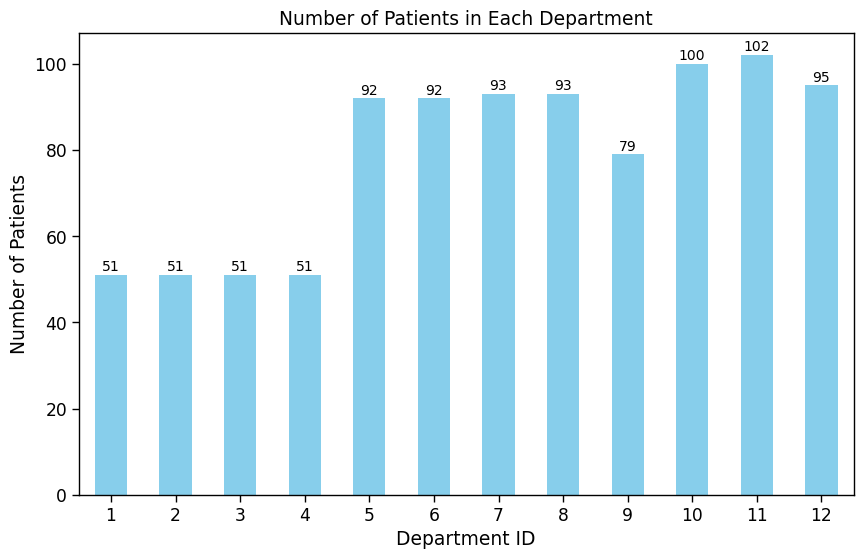

In [193]:
#Q64: Plot a graph by counting the no. of patients in each department.

df1 = AmbulatoryVisits.groupby(['VisitDepartmentID']).size()

# Plotting the graph
plt.figure(figsize=(10, 6))
ax = df1.plot(kind='bar', color='skyblue')
plt.xlabel('Department ID')
plt.ylabel('Number of Patients')
plt.title('Number of Patients in Each Department')
plt.xticks(rotation=0)

# Code to add count labels on each bar
for i, count in enumerate(df1):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

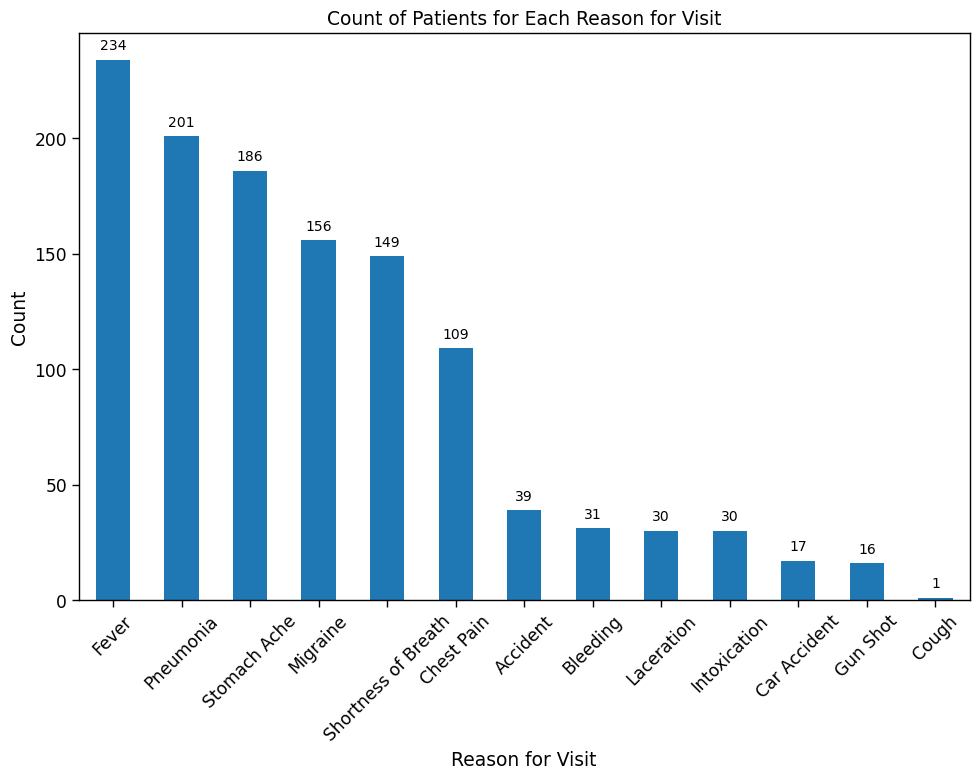

In [202]:
# Question 66:Plot a graph showing the count of patients for the reason visited the hospital.

ReasonForVisit = 'ReasonForVisit'
reason_counts = EDVisits[ReasonForVisit].value_counts()
plt.figure(figsize=(10, 8))
ax = reason_counts.plot(kind='bar')
plt.xlabel("Reason for Visit")
plt.ylabel("Count")
plt.title("Count of Patients for Each Reason for Visit")
plt.xticks(rotation=45)
plt.tight_layout()

# Adding count labels on each bar
for i, count in enumerate(reason_counts):
    ax.text(i, count + 3, str(count), ha='center', va='bottom', fontsize=10)
    
plt.show()


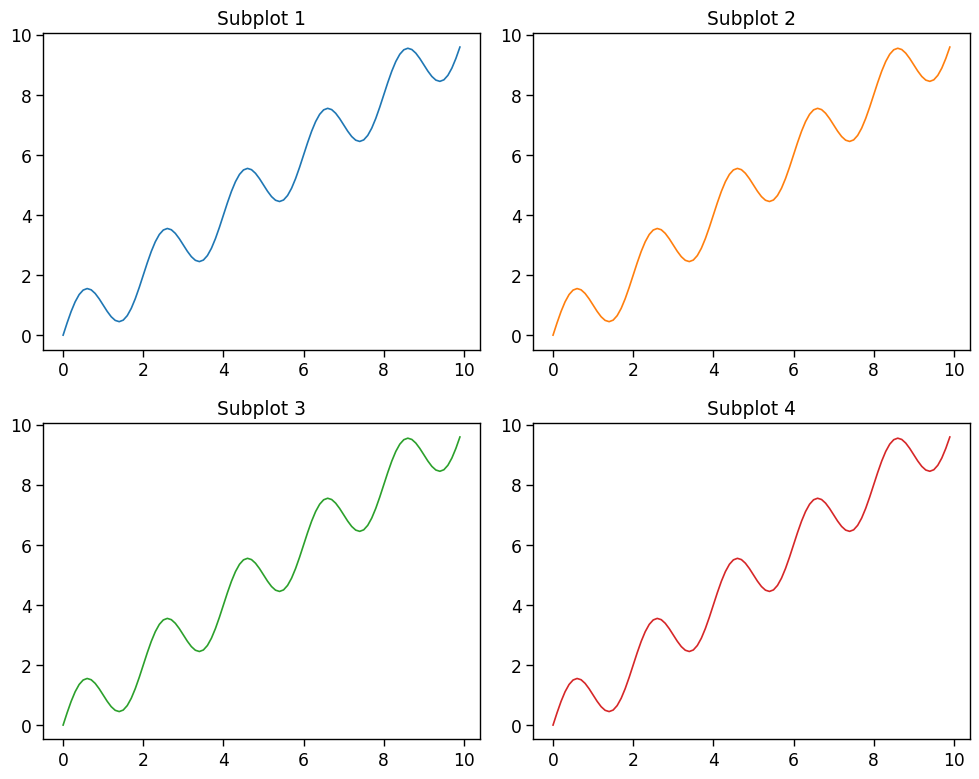

In [86]:
# Question 67:Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.


x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(x, y)
axs[0, 0].set_title("Subplot 1")
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title("Subplot 2")
axs[1, 0].plot(x, y, 'tab:green')
axs[1, 0].set_title("Subplot 3")
axs[1, 1].plot(x, y, 'tab:red')
axs[1, 1].set_title("Subplot 4")
plt.tight_layout()
plt.show()


In [100]:
# Question 68:Make a pivot table by the no. of patients from the admission date till discharge date.

#Pivot Table displaying Discharge date and correponding patient ID for every unique admission date in the AdmissionDate column
pd.pivot_table(Discharges,'PatientID',['AdmissionDate','DischargeDate'],aggfunc=np.sum)

PatientID
AdmissionDate DischargeDate                     
2018-01-01    2018-01-04 19:59:31.391          1
              2018-01-04 21:28:51.898          2
              2018-01-04 22:28:23.672          3
              2018-01-05 05:47:04.933          5
              2018-01-05 14:18:30.029          6
...                                          ...
2018-02-22    2018-03-07 21:22:10.061        738
              2018-03-08 02:43:18.749        739
              2018-03-08 09:27:18.377        740
              2018-03-10 06:06:12.068        741
              2018-03-10 20:38:30.568        742

[720 rows x 1 columns]

In [90]:
#Question 69:Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

#ReadmissionRegistry = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
ReadmissionRegistry['AdmissionDate'] = pd.to_datetime(ReadmissionRegistry['AdmissionDate'])
ReadmissionRegistry['DischargeDate'] = pd.to_datetime(ReadmissionRegistry['DischargeDate'])
ReadmissionRegistry['LengthOfStay'] = (ReadmissionRegistry['DischargeDate'].dt.date - ReadmissionRegistry['AdmissionDate'].dt.date).dt.days
Service = 'Service'
PrimaryDiagnosis = 'PrimaryDiagnosis'
LengthOfStay = 'LengthOfStay'  
pivot_table = pd.pivot_table(ReadmissionRegistry,values='LengthOfStay', index=Service, columns=PrimaryDiagnosis, aggfunc='mean')
print(pivot_table)

PrimaryDiagnosis    AMI  Afib  Broken Leg   Diabetes      Fever        Flu  \
Service                                                                      
Cardiology        10.25  11.2   10.666667        NaN        NaN  12.000000   
General Medicine    NaN   NaN   13.000000  10.289474   8.000000   9.888889   
Hospitalist       10.00   NaN    7.666667   8.846154  10.666667   8.736842   
ICU               12.20   6.0         NaN        NaN  13.333333   8.000000   
Neurology          9.00   NaN         NaN        NaN        NaN   7.000000   
Orthopeadics        NaN   NaN         NaN        NaN        NaN        NaN   

PrimaryDiagnosis  Heart Failure  Hip Fracture  Hypertension  Kidney Failure  \
Service                                                                       
Cardiology             9.512821           NaN           NaN        4.000000   
General Medicine            NaN           NaN      8.914286       10.666667   
Hospitalist                 NaN           NaN     10.666667

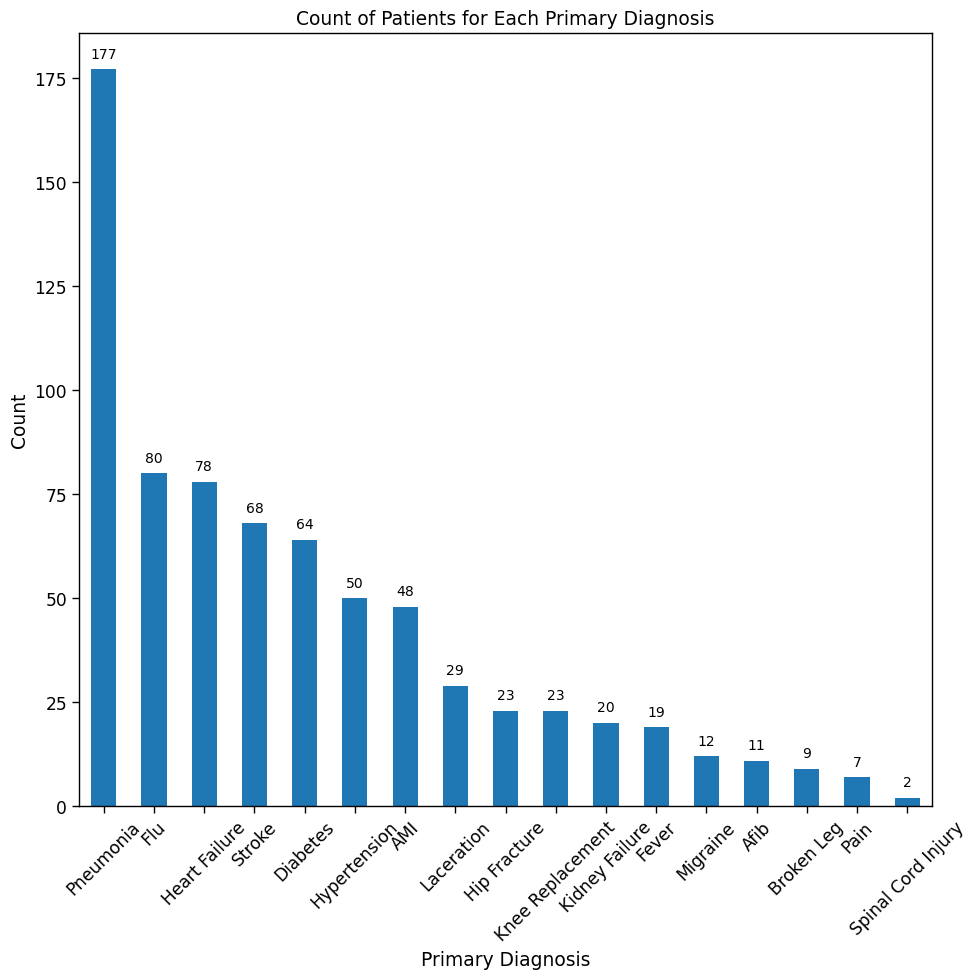

In [210]:
#Question 70: Create a visualization on the count of patients based on primary diagnosis.

PrimaryDiagnosis = 'PrimaryDiagnosis'
diagnosis_counts = ReadmissionRegistry[PrimaryDiagnosis].value_counts()

plt.figure(figsize=(10, 10))
ax = diagnosis_counts.plot(kind='bar')
plt.xlabel("Primary Diagnosis")
plt.ylabel("Count")
plt.title("Count of Patients for Each Primary Diagnosis")
plt.xticks(rotation=45)
plt.tight_layout()

# Code to add count labels on each bar
for i, count in enumerate(diagnosis_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)
    
plt.show()


In [95]:
#Question 71:Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

#Providers = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Providers')
ProviderName = 'ProviderName'
Providers[['FirstName', 'LastName']] = Providers[ProviderName].str.split(expand=True)
print(Providers[['ProviderName', 'FirstName', 'LastName']])

       ProviderName  FirstName  LastName
0         Sally Sue      Sally       Sue
1        Mike Myers       Mike     Myers
2    Jordan Michael     Jordan   Michael
3         Ted Texas        Ted     Texas
4          Ala Bama        Ala      Bama
5        Harry Kane      Harry      Kane
6         Barry Bar      Barry       Bar
7         Ted Green        Ted     Green
8         Ted Black        Ted     Black
9          Fred Man       Fred       Man
10     Kim Kimberly        Kim  Kimberly
11         Sarah Ab      Sarah        Ab
12  Abigail Marriot    Abigail   Marriot
13          Dave Yu       Dave        Yu
14  Christian Saint  Christian     Saint
15     Perry Pardon      Perry    Pardon
16     Kent Kendall       Kent   Kendall
17       Ryan Kevin       Ryan     Kevin
18     Tyler Conner      Tyler    Conner
19    Bailey Barret     Bailey    Barret
20      Megan Bonco      Megan     Bonco
21    Joesph Walter     Joesph    Walter
22      Walter King     Walter      King
23        Luke L

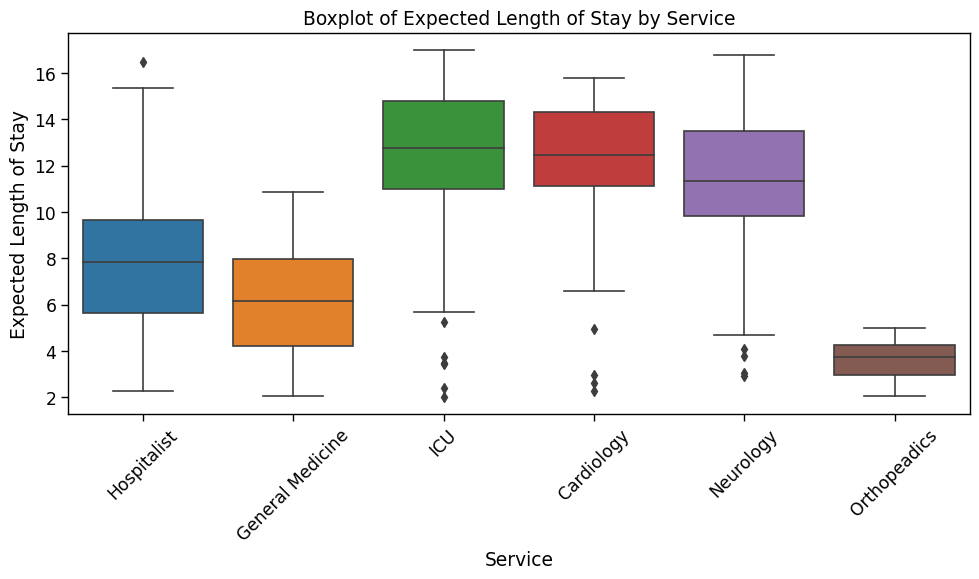

In [97]:
# Question 72:Create a boxplot on ExpectedLOS by taking service into account.


#ReadmissionRegistry = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
ExpectedLOS = 'ExpectedLOS'
Service = 'Service'
plt.figure(figsize=(10, 6))
sns.boxplot(x=Service, y=ExpectedLOS, data=ReadmissionRegistry)
plt.xlabel("Service")
plt.ylabel("Expected Length of Stay")
plt.title("Boxplot of Expected Length of Stay by Service")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

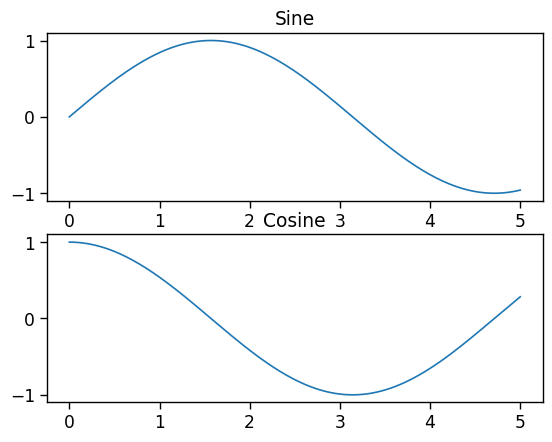

In [259]:
#Question 73 - Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).
x= np.linspace(0,5,200)
y=np.sin(x)
z=np.cos(x)

plt.subplot(2, 1, 1)
plt.title('Sine')
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.plot(x,y)

plt.subplot(2, 1, 2)
plt.title('Cosine')
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.plot(x,z)




In [240]:
#Question 74 - Number of patients on transfer based on primary diagnosis

#Filtering the rows with DischargeDisposition 'Transfer' and using groupby to group based on primary diagnosis
transfer_patients = Discharges.loc[(Discharges['DischargeDisposition']) == 'Transfer']
primaryDiagnosiswise_transfer_counts = transfer_patients.groupby(['PrimaryDiagnosis']).size()

#Printing the results
print('Number of patients on transfer based on primary diagnosis is as shown in the table below: \n')
print(primaryDiagnosiswise_transfer_counts)


Number of patients on transfer based on primary diagnosis is as shown in the table below: 

PrimaryDiagnosis
Afib                1
Diabetes            7
Flu                 2
Heart Failure       9
Knee Replacement    1
Laceration          1
Pain                1
Pneumonia           8
Stroke              9
dtype: int64


In [241]:
#Question 75 - Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

# To get the index of the row with max Systolic BP value
max_BPSystolic_index = AmbulatoryVisits['BloodPressureSystolic'].idxmax()

# To get thw row with maximum  Systolic value using loc
max_systolic_row = AmbulatoryVisits.loc[max_BPSystolic_index]

print(max_systolic_row)


VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object


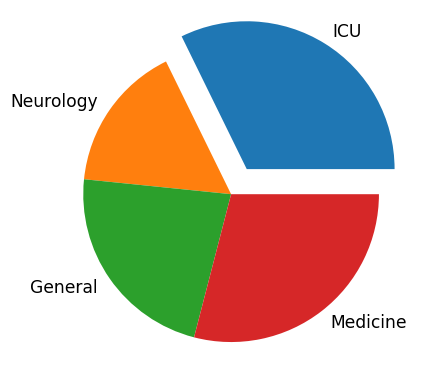

In [242]:
#Question 76 - Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

Service= ["ICU", "Neurology", "General", "Medicine"] 
ExpectedLOS=[10,5,7,9]

myexplode = [0.2,0,0,0]
plt.pie(ExpectedLOS, labels= Service, explode = myexplode)

plt.show()

        

In [243]:
#Question 77 - Calculate mortality by diagnosis.

#Filtering the dataframe for DischargeDisposition = Expired 
expired_patients = Discharges.loc[Discharges['DischargeDisposition'] == 'Expired']
mortality_by_diagnosis = expired_patients.groupby('PrimaryDiagnosis').size()

#Printing the results
print('Mortality by diagnosis is as shown in the table below: \n')
print(mortality_by_diagnosis)



Mortality by diagnosis is as shown in the table below: 

PrimaryDiagnosis
AMI                    6
Afib                   4
Broken Leg             3
Diabetes               9
Fever                  4
Flu                   11
Heart Failure         16
Hip Fracture           3
Hypertension          16
Kidney Failure         2
Knee Replacement       2
Laceration             2
Pain                   1
Pneumonia             16
Spinal Cord Injury     2
Stroke                 7
dtype: int64


In [245]:
#Question 78 - Calculate the time spent in ED Department for each visit.

formatted_EDtime = []

for index, row in EDVisits.iterrows():
    time_in_ED = pd.to_datetime(row['EDDischargeTime']) - pd.to_datetime(row['VisitDate'])
    EDHours = (time_in_ED.components.hours)
    EDMinutes = (time_in_ED.components.minutes)
    EDSeconds = (time_in_ED.components.seconds)
    formatted_EDtime.append(f"{EDHours:02d}:{EDMinutes:02d}:{EDSeconds:02d}")

EDVisits_edited = EDVisits
#type(formatted_EDtime)
EDVisits_edited['Time_Spent _in_ED'] = formatted_EDtime
EDVisits_edited

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,Time_Spent _in_ED
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,11:20:22
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,23:14:20
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,01:50:56
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,01:20:09
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,02:38:20
...,...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged,15:53:09
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged,22:27:04
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged,04:30:03
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged,06:10:35


In [254]:
#Question 79- Which departmentID has maximum number of visits scheduled.


# To count the occurrences of each DepartmentID
department_counts = AmbulatoryVisits['VisitDepartmentID'].value_counts()

# To find the department with the highest number of visits
max_visits_department = department_counts.idxmax()
max_visits_count = department_counts.max()
print("The department ID with highest number of visits is {} with total number of visits = {}".format(max_visits_department,max_visits_count))

The department ID with highest number of visits is 11 with total number of visits = 102


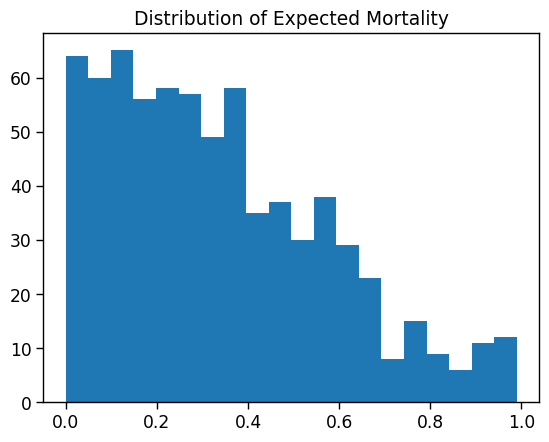

In [252]:
#Question 80 - Plot a graph to show the distribution of expected mortality.

x = Discharges['ExpectedMortality'].values
plt.hist(x, bins=20)
plt.title('Distribution of Expected Mortality')
plt.show()
